# Queen's Real Estate Price Predictor

In [1]:
import pandas as pd

In [2]:
housing = pd.read_csv("data.csv")

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


# #to have a quick insight of data

In [5]:
housing['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [6]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
%matplotlib inline

In [8]:
import matplotlib.pyplot as plt

array([[<AxesSubplot:title={'center':'CRIM'}>,
        <AxesSubplot:title={'center':'ZN'}>,
        <AxesSubplot:title={'center':'INDUS'}>,
        <AxesSubplot:title={'center':'CHAS'}>],
       [<AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'RM'}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'DIS'}>],
       [<AxesSubplot:title={'center':'RAD'}>,
        <AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'PTRATIO'}>,
        <AxesSubplot:title={'center':'B'}>],
       [<AxesSubplot:title={'center':'LSTAT'}>,
        <AxesSubplot:title={'center':'MEDV'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

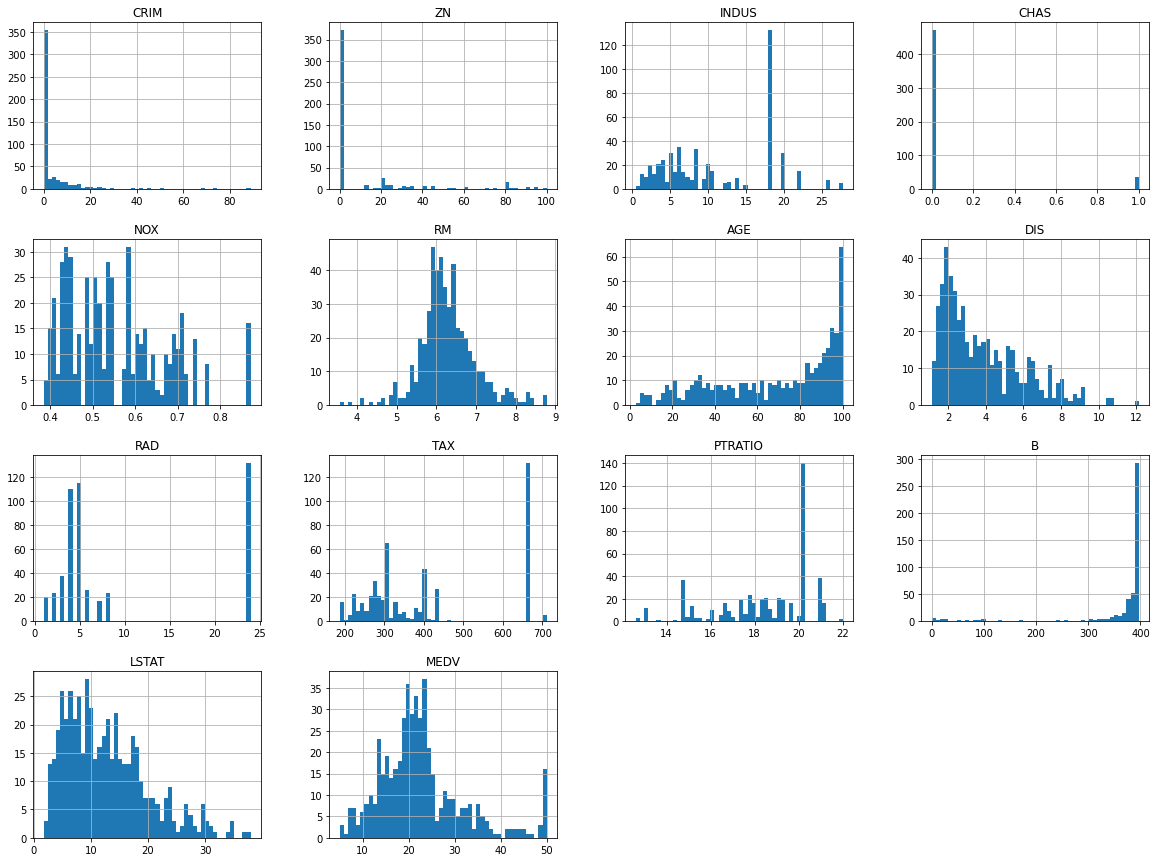

In [9]:
housing.hist(bins=50, figsize=(20,15))

## Train-Test Splitting

In [10]:
#seeding: mostly to 42
#By sklearn library
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing,test_size=0.2, random_state=42)
print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")

Rows in train set: 404
Rows in test set: 102



In [11]:
#doing splitting on basis of an important variable
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['CHAS']):
    strat_train_set= housing.loc[train_index]
    strat_test_set=housing.loc[test_index]

In [12]:
strat_test_set['CHAS'].value_counts()
#both testset and trainset ratio would come same

0    95
1     7
Name: CHAS, dtype: int64

In [13]:
strat_train_set['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [14]:
housing = strat_train_set.copy()
# when working with bigger data, stop here don't go for correlations.

## Looking for correlations 

In [15]:
corr_matrix = housing.corr()

In [16]:
corr_matrix['MEDV'].sort_values(ascending=False)
#if value positive especially 1, strong pos correlation
#else it is negative, its value lies btw -1 to 1

MEDV       1.000000
RM         0.679894
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

array([[<AxesSubplot:xlabel='MEDV', ylabel='MEDV'>,
        <AxesSubplot:xlabel='RM', ylabel='MEDV'>,
        <AxesSubplot:xlabel='ZN', ylabel='MEDV'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='RM'>,
        <AxesSubplot:xlabel='RM', ylabel='RM'>,
        <AxesSubplot:xlabel='ZN', ylabel='RM'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='ZN'>,
        <AxesSubplot:xlabel='RM', ylabel='ZN'>,
        <AxesSubplot:xlabel='ZN', ylabel='ZN'>]], dtype=object)

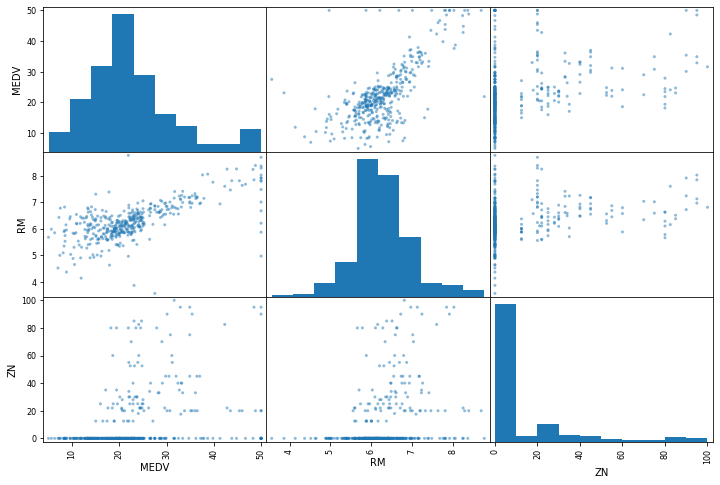

In [17]:
from pandas.plotting import scatter_matrix
attributes = ["MEDV", "RM", "ZN"]
scatter_matrix(housing[attributes],figsize=(12,8))

## Trying attribute combinations

In [18]:
housing["TAXRM"]=housing['TAX']/housing['RM']

In [19]:
housing.head()
# if we now see correlation relations of TAXRM, it comes negative:
# means our regression model is working nicely.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,51.571709
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,42.200452
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7,102.714374
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1,45.012547
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0,45.468948


In [20]:
housing= strat_train_set.drop("MEDV", axis=1)
housing_labels= strat_train_set["MEDV"].copy()

## Missing Attributes

In [21]:
# to get rid of missing attributes, 
 # 1)we can either delete that attribute -> dropna
 # 2) delete whole attribute -> drop
 # 3) putting some values, 0 or median etc. ->putting values median etc
median = housing["RM"].median()
housing["RM"].fillna(median)

254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
       ...  
155    6.152
423    6.103
98     7.820
455    6.525
216    5.888
Name: RM, Length: 404, dtype: float64

In [22]:
housing.describe()
# before we started filling missing attr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.279908,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.712983,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.878750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.210000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630250,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


In [23]:
from sklearn.impute import SimpleImputer
#for missing values
imputer = SimpleImputer(strategy = "median")
imputer.fit(housing)

SimpleImputer(strategy='median')

In [24]:
imputer.statistics_

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.21000e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [25]:
X = imputer.transform(housing)

In [26]:
housing_tr= pd.DataFrame(X, columns=housing.columns)
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.279908,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.712983,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.878750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.210000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630250,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


## Feature Scaling using Standardization 

In [27]:
# We use (value-mean)/std

## Creating pipeline

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy= "median")),
    ('std_scaler', StandardScaler()),
])

In [29]:
housing_num_tr = my_pipeline.fit_transform(housing)
#housing_tr is a numpy array

## Selecting a desired model for our project

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# model = DecisionTreeRegressor()
# model = LinearRegression()
model = RandomForestRegressor()
model.fit(housing_num_tr, housing_labels)

#checking first model by linear regression

RandomForestRegressor()

In [31]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]

In [32]:
prepared_data = my_pipeline.transform(some_data)

In [33]:
model.predict(prepared_data)
#predicting data by linear regression
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

In [34]:
import numpy as np
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
mse = mean_squared_error(housing_labels, housing_predictions)
rmse = np.sqrt(mse)
rmse

1.2546318017333964

In [35]:
# from linear regression, the rmse was not very nice, discard model!
# from decision tree, every data is 
# given so error coming to be zero, this is also not nice model, overfeeding!

## Using better Cross Validation technique 

In [36]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_num_tr, housing_labels, scoring = "neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

In [37]:
rmse_scores

array([2.95277371, 2.88420045, 4.43749955, 2.54860868, 3.30580741,
       2.65255957, 4.50310095, 3.35952257, 3.2540534 , 3.36688046])

In [38]:
def print_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Standard Deviation: ", scores.std())

In [39]:
print_scores(rmse_scores)

Scores:  [2.95277371 2.88420045 4.43749955 2.54860868 3.30580741 2.65255957
 4.50310095 3.35952257 3.2540534  3.36688046]
Mean:  3.3265006746922423
Standard Deviation:  0.634170198497453


## Saving the file

In [40]:
from joblib import dump, load
dump(model, 'Queen.joblib')

['Queen.joblib']

## Testing the model

In [41]:
#finally after chossing the best model, test the data
X_test = strat_test_set.drop("MEDV", axis=1)
Y_test = strat_test_set["MEDV"].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [42]:
final_rmse

2.9426156598456106

In [43]:
print(final_predictions, list(Y_test))

[24.829 11.243 25.406 21.743 19.053 15.048 19.835 14.458 31.448 41.424
 19.454 11.806 23.993 26.632 19.477 11.197 31.598 14.565 23.548 18.696
 20.033 17.534 17.823 21.846 19.084 31.229 16.439 32.639  8.626 33.278
 23.664 21.621 23.281 10.712 20.833 11.909 42.972 24.19  23.281 41.323
 24.088 30.007 20.565 20.655 18.689 33.416 43.811 20.073 20.333 21.904
 20.83  14.628 21.155 14.777 24.804 33.203 41.517 29.169 19.232 20.729
 46.955  9.642 18.878 25.797 14.4   33.485 19.537 18.823 20.003 35.163
 25.453 22.889 21.635 22.598 34.137 13.302 15.672 19.993 20.452 21.379
 22.36  21.184 13.999 23.227 20.461 21.052 13.849 21.511 21.946 23.041
 18.165 26.814  7.297 25.948 18.246 29.147 19.582 31.275 15.142 26.933
 21.307 20.744] [16.5, 10.2, 30.1, 23.0, 14.4, 15.6, 19.4, 14.1, 30.3, 35.2, 23.1, 13.8, 25.0, 27.9, 19.5, 12.3, 32.2, 13.5, 23.8, 21.7, 19.2, 19.5, 10.4, 23.2, 18.6, 28.5, 15.2, 32.0, 7.2, 34.6, 20.1, 20.6, 23.6, 13.1, 23.8, 12.7, 43.1, 24.7, 22.2, 44.0, 28.1, 31.0, 21.7, 23.4, 19.5, 33.1

In [44]:
# Need to use fine tuning as well..
# Finally we found Random Forest as best!

In [45]:
prepared_data[0]

array([-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.24141041, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034])

In [46]:
# The End.